## Question 1: Looking for the missing values

In [63]:
import pandas as pd
import numpy as np

# Load your dataset (adjust 'file_path' as needed)
car_data = pd.read_csv('/content/train.csv')

car_data.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [64]:
mis_vals=car_data.isnull().sum()
mis_vals_percent=100*car_data.isnull().sum()/len(car_data)
missing_data = pd.DataFrame({
    'Missing Values': mis_vals,
    'Percentage': mis_vals_percent
})
print(missing_data)

                   Missing Values  Percentage
Unnamed: 0                      0    0.000000
Name                            0    0.000000
Location                        0    0.000000
Year                            0    0.000000
Kilometers_Driven               0    0.000000
Fuel_Type                       0    0.000000
Transmission                    0    0.000000
Owner_Type                      0    0.000000
Mileage                         2    0.034206
Engine                         36    0.615700
Power                          36    0.615700
Seats                          38    0.649906
New_Price                    5032   86.061228
Price                           0    0.000000


In [65]:
car_data = car_data.drop('New_Price', axis=1)
print(car_data.columns)

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')


In [66]:
num_cols = car_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = car_data.select_dtypes(include=['object', 'category']).columns
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)
for col in num_cols:
    car_data[col] = car_data[col].fillna(car_data[col].mean())
for col in cat_cols:
    car_data[col] = car_data[col].fillna(car_data[col].mode()[0])

Numerical Columns: Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')
Categorical Columns: Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')


In [67]:
print(car_data.isnull().sum())

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


### Justification for Imputation or Dropping Missing Values:

1. **Columns with Few Missing Values** ('Mileage', 'Engine', 'Power', 'Seats'):
   
   **Reason for Imputation**: These columns have a relatively small number of missing values compared to the overall dataset size. Imputing missing values helps retain as much data as possible for analysis, which maintains the dataset's overall structure and statistical properties.
   **Chosen Strategy**:
     
     **Mean Imputation for 'Mileage', 'Engine', and 'Power'**: These are continuous numerical columns, so replacing missing values with the mean is an effective strategy as it preserves the average distribution of the data.
     
     **Mode Imputation for 'Seats'**: This column is discrete (usually with a limited set of typical values, such as 4 or 5 seats). Using the mode helps ensure the imputed value reflects the most common configuration found in the dataset.

2. **Column with Many Missing Values** ('New_Price'):
   **Reason for Dropping**: The 'New_Price' column has a substantial number of missing entries (5032), which represents a significant portion of the data. Imputing such a large amount would introduce substantial bias and might distort the dataset's overall quality.
   
   **Impact**: Dropping the 'New_Price' column prevents the potential introduction of inaccurate or biased data, ensuring that further analysis is based on more reliable features.

###Question 2: Removing the units from some of the attributes

In [68]:
car_data['Mileage']=car_data['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
car_data['Engine'] = car_data['Engine'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
car_data['Power'] = car_data['Power'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)


In [69]:
print(car_data[['Mileage', 'Engine', 'Power']].head())

   Mileage  Engine   Power
0    19.67  1582.0  126.20
1    13.00  1199.0   88.70
2    20.77  1248.0   88.76
3    15.20  1968.0  140.80
4    23.08  1461.0   63.10


###Question 3:  Changing the categorical variables into numerical one hot encoded values

In [70]:
unique_fuel=car_data['Fuel_Type'].unique()
print(unique_fuel)
unique_transmission=car_data['Transmission'].unique()
print(unique_transmission)


['Diesel' 'Petrol' 'Electric']
['Manual' 'Automatic']


In [71]:
car_data = pd.get_dummies(car_data, columns=['Fuel_Type', 'Transmission'], drop_first=True)
print(car_data.head())


   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  Price  \
0              41000      First    19.67  1582.0  126.20    5.0  12.50   
1              46000      First    13.00  1199.0   88.70    5.0   4.50   
2              87000      First    20.77  1248.0   88.76    7.0   6.00   
3              40670     Second    15.20  1968.0  140.80    5.0  17.74   
4              86999      First    23.08  1461.0   63.10    5.0   3.50   

   Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Manual  
0               False             False                 True  
1             

###Question 4:  Creating one more feature and adding this column to the dataset

In [72]:
# Create a new feature: current age of the car
import datetime as dt
current_year = dt.datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']

# Display the first few rows to verify the new feature
car_data[['Year', 'Car_Age']].head()


,Year,Car_Age
0,2015,9
1,2011,13
2,2012,12
3,2013,11
4,2013,11


In [74]:
car_data.to_csv('cleanedtrain.csv', index=False)

#Question 5: Data Manipulation

In [77]:
cd=pd.read_csv('/content/cleanedtrain.csv')
cd.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Car_Age
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,False,False,True,9
1,2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,True,True,13
2,3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,False,False,True,12
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,False,False,False,11
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,False,False,True,11


In [79]:
selected_data = cd[['Name', 'Year', 'Kilometers_Driven']]

print(selected_data)

                                  Name  Year  Kilometers_Driven
0     Hyundai Creta 1.6 CRDi SX Option  2015              41000
1                         Honda Jazz V  2011              46000
2                    Maruti Ertiga VDI  2012              87000
3      Audi A4 New 2.0 TDI Multitronic  2013              40670
4               Nissan Micra Diesel XV  2013              86999
...                                ...   ...                ...
5842                  Maruti Swift VDI  2014              27365
5843          Hyundai Xcent 1.1 CRDi S  2015             100000
5844             Mahindra Xylo D4 BSIV  2012              55000
5845                Maruti Wagon R VXI  2013              46000
5846             Chevrolet Beat Diesel  2011              47000

[5847 rows x 3 columns]


In [80]:
#  Cars with high mileage and older years:
high_mileage_old_cars = cd[(cd['Kilometers_Driven'] > 100000) & (cd['Year'] < 2010)]
print("Cars with high mileage and older years:\n", high_mileage_old_cars[['Name', 'Year', 'Kilometers_Driven']].head())


Cars with high mileage and older years:
                                          Name  Year  Kilometers_Driven
27        Toyota Innova 2.5 V Diesel 7-seater  2007             262000
74                       Toyota Innova 2.0 G1  2006             230000
113               BMW 5 Series 2010-2013 525i  2009             128000
173  Ford Fiesta 1.4 TDCi EXI Limited Edition  2006             216000
175         Chevrolet Optra Magnum 1.6 LS BS3  2007             118500


In [81]:
cd = cd.rename(columns={'Name': 'Car_Name', 'Year': 'Manufacturing_Year'})
print(cd[['Car_Name', 'Manufacturing_Year']].head())

                           Car_Name  Manufacturing_Year
0  Hyundai Creta 1.6 CRDi SX Option                2015
1                      Honda Jazz V                2011
2                 Maruti Ertiga VDI                2012
3   Audi A4 New 2.0 TDI Multitronic                2013
4            Nissan Micra Diesel XV                2013


In [83]:
# Sort the data in ascending order based on 'Kilometers_Driven'
sorted_data_asc = cd.sort_values('Kilometers_Driven', ascending=True)
print("Data sorted in ascending order by Kilometers_Driven:\n", sorted_data_asc[['Car_Name', 'Manufacturing_Year', 'Kilometers_Driven']].head())


Data sorted in ascending order by Kilometers_Driven:
                               Car_Name  Manufacturing_Year  Kilometers_Driven
1315     Maruti Alto 800 2016-2019 VXI                2019                171
5451        Maruti Wagon R ZXI AMT 1.2                2019                600
1203    Jaguar XE 2.0L Diesel Prestige                2018               1000
165   Hyundai Grand i10 1.2 Kappa Asta                2019               1000
1123       Tata Tigor 1.2 Revotron XTA                2018               1000


In [86]:

print(cd[['Kilometers_Driven', 'Car_Age']].describe())


       Kilometers_Driven      Car_Age
count       5.847000e+03  5847.000000
mean        5.841013e+04    10.551565
std         9.237971e+04     3.194949
min         1.710000e+02     5.000000
25%         3.346750e+04     8.000000
50%         5.257600e+04    10.000000
75%         7.249050e+04    12.000000
max         6.500000e+06    26.000000


In [87]:
print(cd[['Engine', 'Power']].describe())

            Engine        Power
count  5847.000000  5847.000000
mean   1628.877031   113.558076
std     601.078362    53.820666
min      72.000000    34.200000
25%    1198.000000    75.940000
50%    1496.000000    98.590000
75%    1991.000000   138.100000
max    5998.000000   560.000000


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns


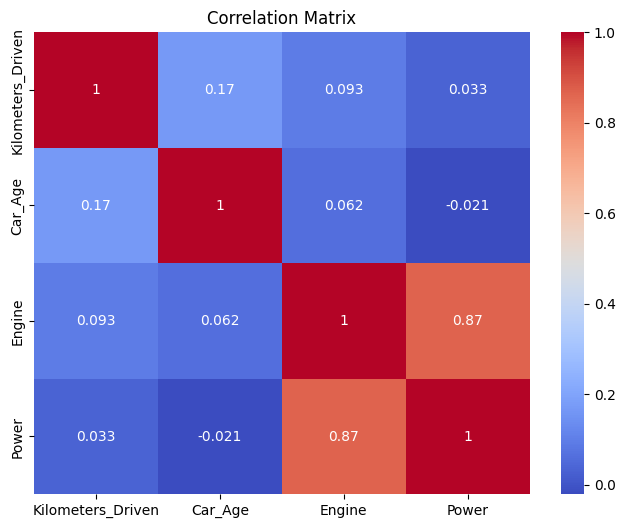

In [93]:
# Example 4: Correlation Matrix Heatmap
correlation_matrix = cd[['Kilometers_Driven', 'Car_Age', 'Engine', 'Power']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()